# Basic setup for fetching data from the facebook api

### Remember to add an active access token below and adjust the parameters and fields if necessary

In [ ]:
# must be specified to be able to use methods of package
import sys
sys.path.append('../src') 
import numpy as np
import pandas as pd
from political_ads.api_request import API_request
from political_ads.preprocessor import Preprocessor

# Generates a dataset (in the data directory)
requestor = API_request()
# requestor.generate_dataset(500, "climate", "EAAD3So8oorMBAMG0icdlft8e9Sjis7jSwoMsaLnsTadVrpysOaZA4H87Kay8eWHajacEfysxUqCkAIwKYD2jEfgy7ZBtmMtuZCRiwZBNyWpy7u0c7W2K2DtRELUyNXOv9ukN5M2Gum4DJ0FdDYffwiheYjI8VcbUJtFHPqaZBA9nCJaFw1lEXhDAMZCcEeyEAqJMKgzgEBRpH7RDI4YDngPmNzIf3UFIsI4qs0vNOv8j9CItNwNORQAiSM3zADXZBoZD")


In [ ]:
# Returns text file as dataframe with transformations
preprocess = Preprocessor()
data = preprocess.file_to_df("..\\data\\generated_dataset.txt")

In [ ]:
data.head(2)

In [ ]:
'''
Visualization attempts
https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/09_timeseries.html
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting spending over time and impressions over time 
fig, axes = plt.subplots(2,1,figsize=(8,4))
data.plot(x="ad_creation_time", y="impressions", ax=axes[0])
data.plot(x="ad_creation_time", y="spend", ax=axes[1])

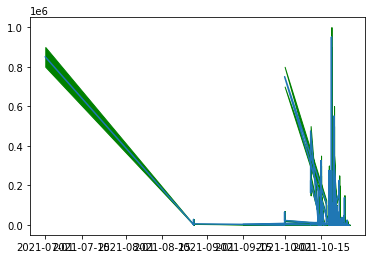

In [29]:
# Plot range of impressions
plt.fill_between(x=data["ad_creation_time"], y1=data["impressions_lo"], y2=data["impressions_hi"], alpha=1, color="green")
plt.plot(data["ad_creation_time"], data["impressions"])
plt.show()

In [ ]:
'''
Amount spend by facebook page
'''
by_page = data.groupby("page_name").agg(
    # Aggregate no of ads
    no_ads = ('id', 'count'),
    # Aggregate sum of spend & total impressions generated
    spend_lo = ('spend_lo', 'sum'),
    spend_hi = ('spend_hi', 'sum'),
    impressions_lo = ('impressions_lo', 'sum'),
    impressions_hi = ('impressions_hi', 'sum'),
    # Average number of impressions & spend per ad
    avg_impressions = ('impressions', 'mean'),
    avg_spend = ('spend', 'mean')

).reset_index()

by_page

KeyError: 'spend'

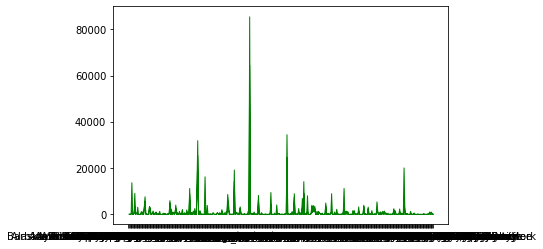

In [28]:
# Display range of spend

# Maybe normalize it
plt.fill_between(x=by_page["page_name"], y1=by_page["spend_lo"], y2=by_page["spend_hi"], alpha=1, color="green")
plt.plot(by_page["page_name"], by_page["spend"])
plt.show()

In [ ]:
'''
Congress member filtering
'''

congress_members = pd.DataFrame(pd.read_csv("..\\src\\data_sets\\legislators-current.csv"))

In [ ]:
congress_members["facebook"]

In [ ]:
congress_members["facebook"].isnull().sum()
537-165

In [ ]:
# Scraper experiement
# https://github.com/kevinzg/facebook-scraper

from facebook_scraper import get_page_info

page = get_page_info(account="senatorcantwell")

page

In [ ]:
import time

members_fbNames = [] # list of tuples
members_fbNames_test = [] # list of tuples

for value in congress_members["facebook"][:50].items():
    if not pd.isnull(value[1]):
        page = get_page_info(account=value[1])
        print(page)
        if "name" in page:
            members_fbNames_test.append((value[1], page["name"]))
            print(page["name"])
    time.sleep(0.5)

In [ ]:
members_names = pd.DataFrame(members_fbNames, columns=["facebook", "page_name"])
members_names.shape

In [ ]:
members_fbNames_test

In [ ]:
# Save data as csv
members_names.to_csv("..\\src\\data_sets\\congress_fbNames.csv", index=False, header=True)